Notebook companion for _**"Pandas Essentials"**_ modul

In [ ]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Series

##Creating Series

In [ ]:
#Empty Series
s = pd.Series(name = "Empty Series")
s

In [ ]:
#Create from Dictionary
d = {"apples": 10, "bananas": 20, "cherry": 50}
s = pd.Series(d, name="Fruit Series")
s

In [ ]:
#Create from file
filename = 'https://raw.githubusercontent.com/urfie/DataAnalytics/main/fruits_data.csv'
fs = pd.read_csv(filename, squeeze=True, index_col=0)
fs

##Series Operations

In [ ]:
fs['cherry']+=5           #updating an item
fs

In [ ]:
'grape' in fs      #check membership

In [ ]:
fs/10              #math operation

In [ ]:
max(fs)            #max, min, avg

##Operation between Series![WhatsApp Image 2024-01-31 at 20.33.44.jpeg](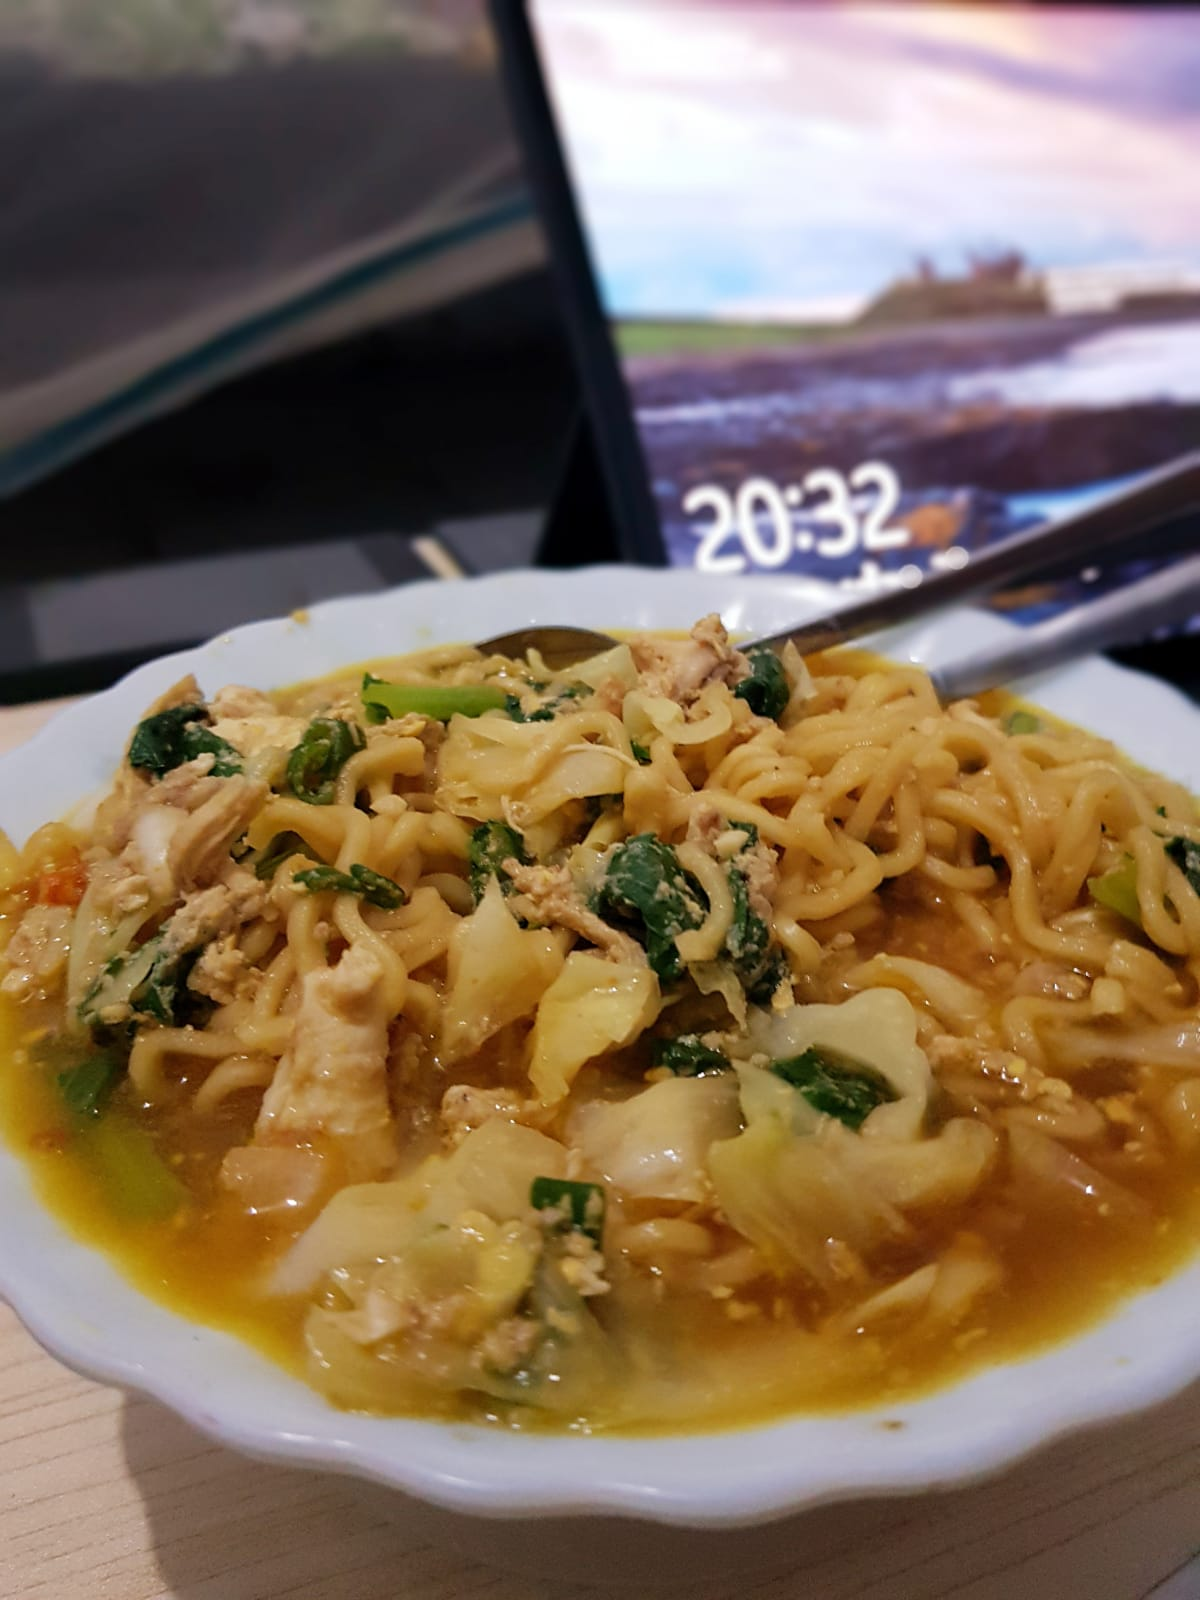![WhatsApp Image 2024-01-31 at 20.33.44.jpeg](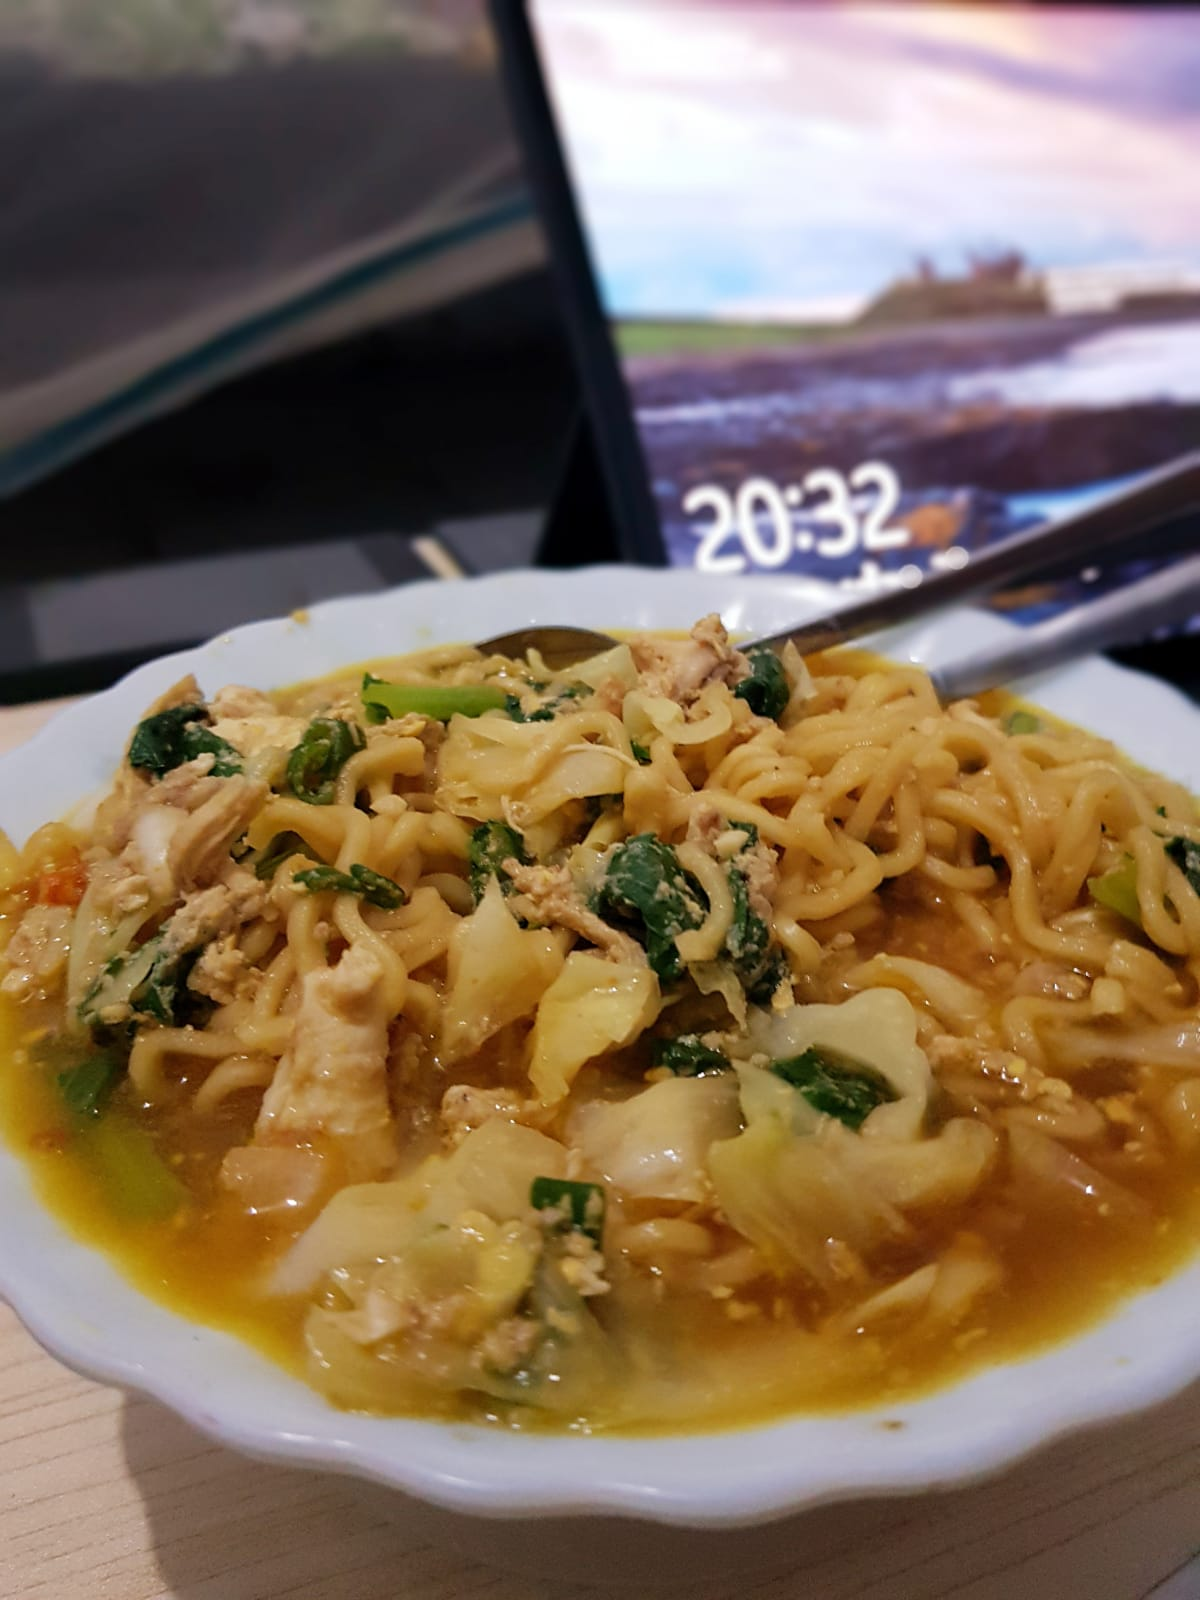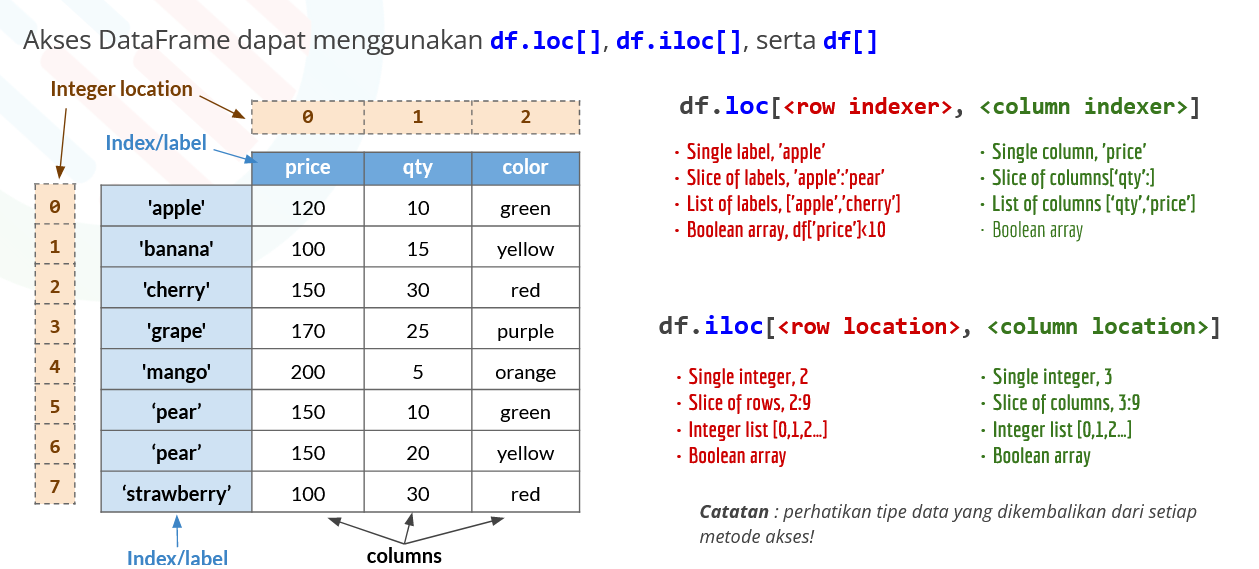))

In [ ]:
qty = pd.Series({"apple":10, "banana":20, "cherry":50})
qty

In [ ]:
price = pd.Series({"apple":100, "banana":120, "cherry":500})
price

In [ ]:
qty*price

##Series Access

In [ ]:
f = {"apple": 10, "banana": 20, "cherry": 50, "pear": 30}
fs = pd.Series(f)
fs

###Access single item

loc vs iloc

In [ ]:
fs.loc["apple"]

In [ ]:
fs.iloc[0]

array access

In [ ]:
fs[0]

In [ ]:
fs["apple"]

###Slicing Series

loc vs iloc

In [ ]:
fs.loc["banana":"cherry"]

In [ ]:
fs.iloc[1:2]

array access

In [ ]:
fs["banana":"cherry"]

In [ ]:
fs[1:2]

#DataFrame

##Creating DataFrame

In [ ]:
#empty dataframe
s = pd.DataFrame()
s

In [ ]:
#create from dictionary
f = {'name':["apple","banana","cherry","pear"],
     'quantity':[10, 20, 50, 30],
     'price':[1000,500,750,900]}

pd.DataFrame(f)

In [ ]:
#create from dictionary of Series
s1 = pd.Series({"apple":10,"banana":20, "cherry":50,"pear":30})
s2 = pd.Series({"apple":1000,"banana":500, "cherry":750,"pear":900})
pd.DataFrame({"price":s1,"quantity":s2})

In [ ]:
#Loading from file
filename = 'https://raw.githubusercontent.com/urfie/DataAnalytics/main/fruits_data.csv'
df = pd.read_csv(filename)
df

##Quick Checking

In [ ]:
#DataFrame quick checking methods and attributes

f = {'name':["apple","banana","cherry","pear"],
     'quantity':[10, 20, 50, None],
     'price':[1000,500,750,900]}
df = pd.DataFrame(f, index=[5,6,7,8])
df

In [ ]:
#Get the first 10 rows : df.head()
df.head()

In [ ]:
#Get the last 10 rows : df.tail()
df.tail()

In [ ]:
#Show dataframe info : df.info()
df.info()

In [ ]:
#Show dataframe shape : df.shape
df.shape

In [ ]:
#Get dataframe columns : df.columns
df.columns

###Descriptive Statistics

In [ ]:
print(df)
print("\nRow count :\n",df.count())
print("\nAverage of quantity :", df['quantity'].mean())
print("\nMin of price :", df['price'].min())
print("\nMax of name :", df['name'].max())

In [ ]:
#summary statistics
df.describe()

In [ ]:
df.describe().transpose() #for a better reading

##Accessing DataFrame

Akses DataFrame dapat menggunakan `df.loc[]`, `df.iloc[]`, serta `df[]`

Sintaksnya adalah :

* menggunakan loc :  `df.loc[<row indexer>, <column indexer>]`
* menggunakan iloc :  `df.iloc[<row location>, <column location>]`




In [ ]:
f1 = {
    'price':[120,100,150,170,200,150,150,100],
    'quantity':[10,15,30,25,5,10,20,30],
    'color':['green','yellow','red','purple','orange','green','yellow','red']
}
name = [ 'apple','banana','cherry','grape','mango','pear','pear','strawberry']

df1 = pd.DataFrame(f1, index = name)
df1

###Single element

In [ ]:
#loc [single label, single column]
df1.loc['pear','price']

In [ ]:
#loc [single integer, single integer]
df1.iloc[5,0]

###Slicing

In [ ]:
#loc [slice of labels, slice of columns]
df1.loc['cherry':'pear','price':'quantity']

In [ ]:
#iloc [slice of rows location, slice of columns location]
df1.iloc[2:6,0:1]

###Using list

In [ ]:
#loc [list of labels, list of columns]
df1.loc[['apple','pear'],['color','price']]

In [ ]:
#iloc [list of row locations, list of column locations]
df1.iloc[[0,5,6],[2,0]]

###Boolean

In [ ]:
#loc [list of booleans]
df1.loc[[True,False,True,True,False,False,True,False],[False,False,True]]

In [ ]:
#iloc [list of booleans]
df1.iloc[[True,False,True,True,False,False,True,False],[False,False,True]]

##Filtering (select by conditions)

Kita dapat memilih baris berdasarkan kondisi berdasarkan nilai kolom menggunakan df[] atau df.loc[]


In [ ]:
df1[df1['quantity'] > 20]     #filtering/select rows

Gunakan operator boolean `&` (and) `|` (or) untuk menggabungkan beberapa kondisi


In [ ]:
df1.loc[(df1.color == 'green') | (df1.price > 150)] #filter by multiple condition

In [ ]:
df1[(df1.price > 150) & (df1.price < 200)] #filter by multiple condition

##Select using list

Kita juga dapat memilih berdasarkan daftar nilai dengan menggunakan fungsi isin(list of value) .

In [ ]:
df1['color'].isin(['green','yellow'])

In [ ]:
df1.loc[df1['color'].isin(['green','yellow'])]

In [ ]:
#list + condition
df1.loc[df1['color'].isin(['green','yellow']) \
        | (df1['quantity'] < 10)]

##Missing Values

Default untuk missing value atau Null di Pandas adalah NaN, tetapi null dapat juga berupa None (null Python)

In [ ]:
df = pd.DataFrame({
    'name': ['apple', 'apple', 'pear', 'pear', 'banana','banana'],
    'color': ['red', 'green', np.nan, 'yellow', 'yellow',None],
    'qty': [4, 4, 5, 15, 15,np.nan]
    })
df

Untuk memeriksa apakah suatu elemen null, gunakan `isna()`, `isnull()`, `notnull()`, atau `notna()`


In [ ]:
#check null value
print("\nFind null values : df.isna() ")
print(df.isna())

print("\nFind non-null values : df.notna()")
print(df.notna())

print("\nFind null values in a column : df.color.isna()")
print(df.color.isna())

print("\nShow the number of null values in each column : df.isna().sum()")
print(df.isna().sum())

Filtering berdasar null value

In [ ]:
#filter rows with null/notnull value
print("Show rows where color is NULL")
print(df[df.color.isna()])

print("\nShow rows where color is not NULL")
print(df[df.color.notna()])

print("\nShow rows where color is NULL")
print(df[df.color.isnull()])

print("\nShow rows where color is not NULL")
print(df[df.color.notnull()])

Untuk mengisi value null, gunakan `fillna()`

In [ ]:
#fill missing value with a default value
df.fillna(value=0)

In [ ]:
#fill missing value with other method
print("Fill null with the previous value")
print(df.fillna(method='bfill'))

print("\nFill null with the next value")
print(df.fillna(method='ffill'))

Untuk menghapus data yang mengandung missing value, gunakan `dropna()`

In [ ]:
#drop rows with missing value
print("Drop row when any column is null")
print(df.dropna())

print("\nDrop row when all columns are null")
print(df.dropna(how='all'))

print("\nDrop row with minimal number of non null columns")
print(df.dropna(thresh=2))

print("\nDrop row with subset columns")
print(df.dropna(subset=['name','qty']))


##Updating DataFrame

###Adding new rows

In [ ]:
df = pd.DataFrame({
    'name': ['apple', 'apple', 'pear', 'pear', 'banana','banana'],
    'color': ['red', 'green', 'green', 'yellow', 'yellow','yellow'],
    'qty': [4, 4, 5, 15, 15,13]
    })
df

Untuk menambahkan baris baru, kita bisa langsung meng-assign sebuah dictionary ke lokasi indeks yang baru

In [ ]:
#adding new rows assigning dictionary to new location

fnew = {'name': 'mango',
        'qty':10,
        'color':'orange'}
df.loc[6] = fnew
df


Menggunakan fungsi `pandas.concat(list of dataframes)`

In [ ]:
#adding new row using append

fnew = {'name': 'mango',
        'qty':20,
        'color':'green'}
dfnew = pd.DataFrame(fnew, index =[7])
pd.concat([df,dfnew])

Assignment ke indeks baru mengupdate DataFrame langsung (in place), sedangkan concat mengembalikan dataframe baru

###Delete Rows

In [ ]:
#Drop rows by index
df.drop([0,3])

In [ ]:
#Drop rows by conditions
df.drop(df[df['qty'] == 15].index)

In [ ]:
#Note that the dataframe is unchanged
print(df)

###Adding new columns

In [ ]:
#adding new column
df = pd.DataFrame({
    'name': ['apple', 'apple', 'pear', 'pear', 'banana','banana'],
    'color': ['red', 'green', 'green', 'yellow', 'yellow','yellow'],
    'qty': [4, 4, 5, 15, 15,13]
    })
rack_id = [10,11,10,12,10,9]
df

In [ ]:
df['rack_id'] = rack_id #with assignment
df

In [ ]:
df.insert(2, 'rack_id_dup', rack_id) #with insert, must specify location
df

Duplikasi nama kolom

In [ ]:
df.insert(2, 'rack_id', rack_id,allow_duplicates=True) #with insert, must specify location
df

###Delete columns

Menghapus kolom dilakukan menggunakan fungsi `df.drop()` dengan parameter `axis = 1` atau menggunakan parameter `columns`

In [ ]:
#Drop columns by setting axis=1
df.drop(['rack_id', 'qty'], axis=1)

In [ ]:
#Drop columns by setting columns parameter
df.drop(columns=['rack_id', 'qty'])

In [ ]:
df

In [ ]:
#Drop columns with inplace=True
df.drop(columns=['rack_id_dup'], inplace=True)
df

###Rename columns

Mengubah nama kolom dilakukan menggunakan fungsi df.rename()

In [ ]:
df.rename(columns={"rack_id": "rack", "qty": "quantity"})

In [ ]:
colnames=['nama','warna','no_rack','id_rack','jumlah']
df.columns=colnames
df

##Working with Strings




In [ ]:
df = pd.DataFrame({
    'name': ['Apple', 'Apple ', 'pear', 'pear', 'Banana','banana'],
    'color': ['red', 'green', 'green', 'yellow', 'yellow','yellow'],
    'qty': [4, 4, 5, 15, 15,13]
    })
df

Secara default, strings dalam Pandas dideteksi sebagai object
Untuk mengakses sebuah kolom  sebagai string, gunakan Series.str
Misalnya untuk mengubah nilai string sebuah kolom menjadi lowercase :` df['column_name'].str.lower()`

In [ ]:
df['name'].str.lower()

In [ ]:
df['name'].str.lower().str.strip()

In [ ]:
df[df['name'].str.contains('e')]

In [ ]:
df['a-letter'] = df['name'].str.count('a')
df

##Duplicate & Unique values

In [ ]:
#check duplication
df = pd.DataFrame({
    'name': ['apple', 'apple', 'pear', 'pear', 'banana','banana'],
    'color': ['red', 'green', 'green', 'yellow', 'yellow','yellow'],
    'qty': [4, 4, 5, 15, 15,13]
    })
print("Duplicate by considering all columns (exact row duplicate)")
print(df.duplicated())
print("\nDuplicate by considering only subsets of columns")
print(df.duplicated(subset=['name','color']))

In [ ]:
#Show the duplicated rows only
print("Duplicate by considering all columns (exact row duplicate)")
print(df.loc[df.duplicated()])

print("\nDuplicate by considering only subsets of columns, show all")
print(df.loc[df.duplicated(subset=['name','color'], keep=False)])

In [ ]:
#drop duplicates
print("Drop exact row duplicates")
print(df.drop_duplicates())

print("\nDrop duplicate by considering only subsets of columns, keeping the last one")
print(df.drop_duplicates(subset=['name','color'], keep='last'))

In [ ]:
#show unique value of a column
print("Unique value of column 'color'")
print(df['color'].unique())

print("\nNumber of unique value of column 'color'")
print(df['color'].nunique())

#show unique value of multiple columns
print("\nUnique value of combined columns 'name' and 'color'")
print(df[['name','color']].drop_duplicates())

##Combining DataFrames

Menggabungkan 2 DataFrame by kolom (join) dilakukan dengan fungsi pd.merge()
Secara default, join yang dilakukan adalah inner join. Untuk memilih jenis join yang lain, gunakan parameter `how` : ***left, right, outer***

In [ ]:
df = pd.DataFrame({'name':["apple", "banana", "cherry", "lemon", "pear", "strawberry"],
                   'qty':[10, 20, 30, 40, 50, 10]})
colors = pd.DataFrame({'name':["apple", "banana", "cherry", "pear", "strawberry", "apple"],
                       'color':['red', 'yellow', 'red', 'green', 'red', 'green']})

pd.merge(df, colors, on='name')

In [ ]:
pd.merge(df, colors, on='name', how='outer')

##Grouping and Aggregation

###Aggregate

Fungsi agregasi dalam pandas adalah DataFrame.aggregate() or DataFrame.agg()


In [ ]:
df = pd.DataFrame({
    'name': ['apple', 'apple', 'apple', 'pear', 'pear', 'banana','banana'],
    'color': ['red', 'green', 'green', 'green', 'yellow', 'yellow','yellow'],
    'qty': [4, 4, 5, 6, 15, 15,13.0],
    'price': [10, 10, 15, 20, 25, 15, 15.0]
    })

df


####single function

Agregasi menggunakan parameter satu fungsi menghasilkan Series


In [ ]:
df[['qty','price']].agg(np.sum)

In [ ]:
df[['qty','price']].agg("sum")

####multiple functions

Agregasi menggunakan parameter list of function(s) menghasilkan DataFrame


In [ ]:
df[['qty','price']].agg(["sum","mean"])

In [ ]:
df[['qty','price']].agg(["sum"])

###Grouping DataFrame

Pengelompokan data dilakukan dengan fungsi DataFrame.groupby()

Kita dapat menggunakan parameter berupa single column/index atau multiple columns/indexes dalam list

Fungsi groupby mengembalikan GroupBy object, yaitu sekumpulan DataFrame yang dikelompokkan berdasar kriteria tertentu

In [ ]:
#group by single column
print(df.groupby("color"))

In [ ]:
#group by list of column(s)
print(df.groupby(["color"]))
print(df.groupby(["name","color"]))

Objek GroupBy dapat diiterasi


In [ ]:
#iterate on groupby object
grouped=df.groupby(["color"])
for name, group in grouped:
   print(name)
   print(group)

###Aggregate on GroupBy

Secara default, kolom yang digunakan untuk pengelompokan akan dijadikan indeks pada DataFrame yang dihasilkan
Pengelompokan beberapa kolom akan menghasilkan DataFrame multi-indeks

In [ ]:
#apply function on groupby object
grouped = df.groupby(["name"])
grouped.mean(['qty','price'])

Untuk mengubahnya, kita dapat mengatur parameter `as_index` pada fungsi groupby menjadi `False`

In [ ]:
#to get a single indexed result
grouped = df.groupby(["name"], as_index = False) #don't set the grouped columns as index
grouped.agg("mean",['qty','price'])

Kita juga bisa menggunakan `DataFrame.reset_index()` pada DataFrame hasil agregasi

In [ ]:
#another way to get a single indexed result
grouped = df.groupby(["name"])
grouped.agg("mean",['qty','price']).reset_index()

Menggunakan dictionary

In [ ]:
#apply multiple aggregation function
grouped = df.groupby(["name"])
grouped.agg({"qty":["mean","sum","max","min"],
            "price":["median","max","min"]})#.reset_index()

In [ ]:
#apply multiple aggregation function
grouped = df.groupby(["name"])
grouped.agg({"qty":["mean","sum","max","min"],
            "price":["median","max","min"]})#.reset_index()

In [ ]:
#apply multiple aggregation function
grouped = df.groupby(["name"])
grouped.agg({"qty":["mean","sum","max","min"],
            "price":["median","max","min"]}).reset_index()

####Named result (memberi nama hasil agregasi)

Secara default, nama kolom agregasi sama dengan nama fungsi, misalnya sum, mean, dll.
Untuk mengganti nama kolom hasil, panggil fungsi tersebut sebagai tupel dan assign hasil fungsi tersebut ke nama yang diinginkan


In [ ]:
#named result
grouped = df.groupby(["name"])
grouped.agg(
    min_qty=('qty','min'),
    max_price=('price','max'),
    mean_price=('price','mean')
   )#.reset_index()

##Visualizing Pandas

Pandas menyediakan fungsi ‘pembungkus’ untuk matplotlib
Gunakan parameter `kind` dengan fungsi `df.plot`, atau gunakan fungsi `df.plot.<kind>`

Pandas plot menggunakan index sebagai default x value


In [ ]:
df = pd.DataFrame({
    'name': ['apple','apple','apple','pear','pear','banana','banana','cherry','lemon','lemon'],
    'color': ['red','green','green','green','yellow','yellow','yellow','red','yellow','orange'],
    'qty': [4, 4, 5, 6, 15, 15, 13.0, 10, 6, 5],
    'price': [10, 10, 15, 20, 25, 15, 15, 18, 10, 12]
    })

df

Contoh : bar plot

In [ ]:
grouped = df.groupby(["color"])
agg1 = grouped.agg(
    avg_price=('price','mean'),
    max_qty=('qty','max'),
   )
agg1.plot(kind='bar')

In [ ]:
df.plot.bar()

Contoh : scatter plot

In [ ]:
df.plot(x="qty", y="price", kind="scatter")

In [ ]:
df['color'].value_counts()

In [ ]:
df['color'].value_counts().plot(kind='bar')

In [ ]:
df['color'].value_counts().plot.pie()

###Seaborn plot

In [ ]:
sns.countplot(df['color'], palette="plasma")

In [ ]:
sns.scatterplot(x="qty", y="price", data=df)

##I/O Operations

* The pandas I/O API is a set of top level reader & writers functions, in the form of pandas.read_file format() and pandas.to_file format()
* Some of the popular readers functions are pandas.read_csv(), pandas.read_json(), pandas.read_sql(), and pandas.read_pickles()
* For complete list of available reader & writers see https://pandas.pydata.org/docs/user_guide/io.html


###Save to json

In [ ]:
df = pd.DataFrame({
    'name': ['apple','apple','apple','pear','pear','banana','banana','cherry','lemon','lemon'],
    'color': ['red','green','green','green','yellow','yellow','yellow','red','yellow','orange'],
    'qty': [4, 4, 5, 6, 15, 15, 13.0, 10, 6, 5],
    'price': [10, 10, 15, 20, 25, 15, 15, 18, 10, 12]
    })

df

In [ ]:
df.to_json()#orient='columns')

In [ ]:
df.to_json(orient='split')

In [ ]:
df.to_json(orient='records')

In [ ]:
df.to_json(orient='values')